# Exploratory Data Analysis

# Objectives
### After completing this lab you will be able to:
* Explore features or characteristics to predict price of car
* Analyze patterns and run descriptive statistical analysis
* Group data based on identified parameters and create pivot tables
* Identify the effect of independent attributes on price of cars

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests

# Download the csv from server

In [4]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

response = requests.get(file_path)
with open('automobileEDA.csv','wb') as f:
    f.write(response.content)

# Make dataframe using pandas

In [11]:
df = pd.read_csv("automobileEDA.csv", header=0)

## How to choose the right visualization method?
* When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.

## Question #1:¶
#### What is the data type of the column "peak-rpm"?

In [13]:
#Ans:
df["peak-rpm"].dtypes

dtype('float64')

## We can calculate the correlation between variables of type "int64" or "float64" using the method "corr":

In [19]:
numeric_df = df.select_dtypes(include=["int64","float64"])
numeric_df.corr().head(5)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356


# Question #2: 
### Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.

Hint: if you would like to select those columns, use the following syntax: df[['bore','stroke','compression-ratio','horsepower']]

In [22]:
df[['bore','stroke','compression-ratio','horsepower']].corr().head(2)

,bore,stroke,compression-ratio,horsepower
bore,1.00000,-0.05539,0.001263,0.566936
stroke,-0.05539,1.00000,0.187923,0.098462


# Positive Linear Relationship
* Let's find the scatterplot of "engine-size" and "price".

(0.0, 53425.38496855859)

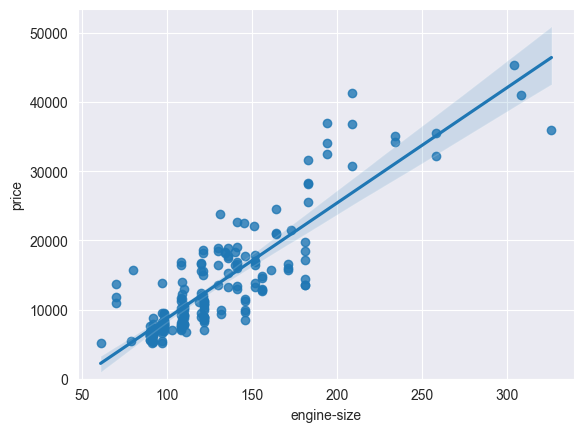

In [24]:
sns.regplot(x = "engine-size", y = "price", data = df)
plt.ylim(0,)

## Highway mpg is a potential predictor variable of price. Let's find the scatterplot of "highway-mpg" and "price".

<Axes: xlabel='highway-mpg', ylabel='price'>

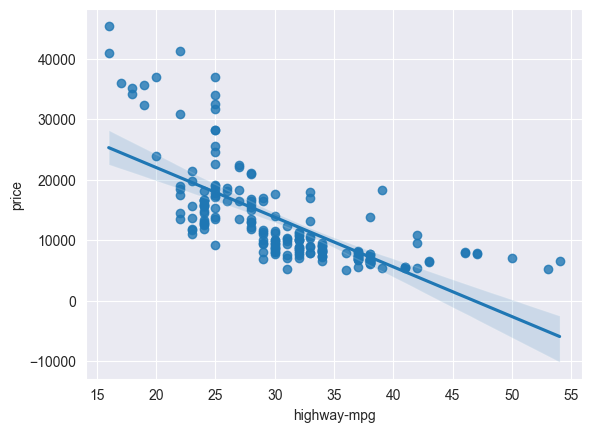

In [25]:
sns.regplot(x = 'highway-mpg', y = 'price', data = df)

In [27]:
df[['highway-mpg', 'price']].corr()
# We can examine the correlation between 'highway-mpg' and 'price' and see it's approximately -0.704.

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


# Weak Linear Relationship

### Let's see if "peak-rpm" is a predictor variable of "price".

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


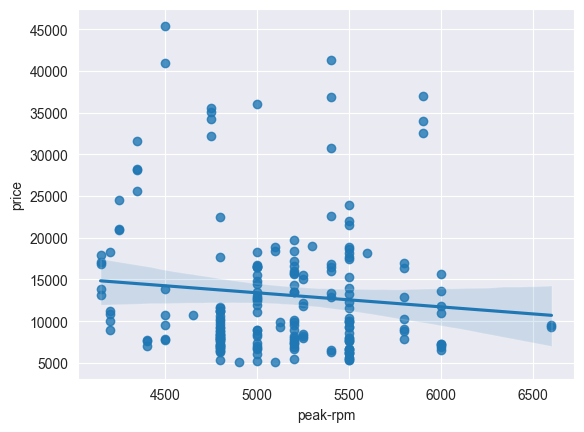

In [28]:
sns.regplot(x="peak-rpm", y="price", data=df)
df[['peak-rpm','price']].corr()

# Question 3 a): 
### Find the correlation between x="stroke" and y="price".

Hint: if you would like to select those columns, use the following syntax: df[["stroke","price"]].

In [35]:
df[["stroke","price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


# Question 3 b):
### Given the correlation results between "price" and "stroke", do you expect a linear relationship?

Verify your results using the function "regplot()".

<Axes: xlabel='stroke', ylabel='price'>

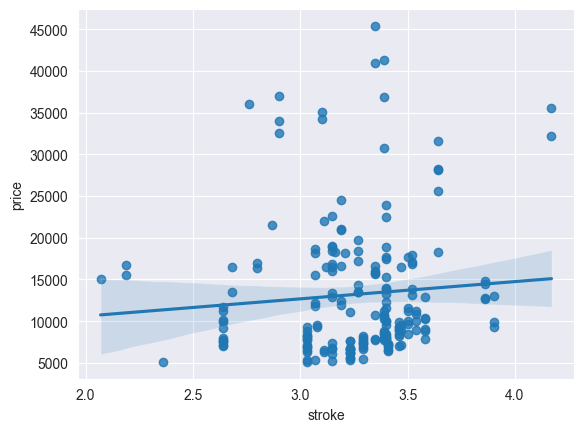

In [36]:
sns.regplot(x="stroke", y="price", data=df)

# Categorical Variables
* These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

#### Let's look at the relationship between "body-style" and "price".

<Axes: xlabel='body-style', ylabel='price'>

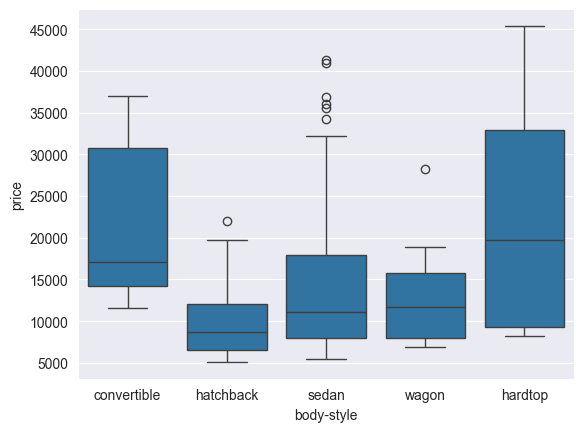

In [37]:
sns.boxplot(x = "body-style", y = "price", data = df)

##### We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price":

<Axes: xlabel='engine-location', ylabel='price'>

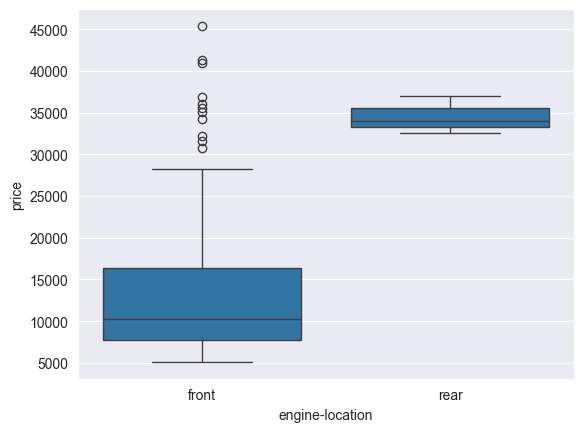

In [38]:
sns.boxplot(x="engine-location", y="price", data=df)

<Axes: xlabel='drive-wheels', ylabel='price'>

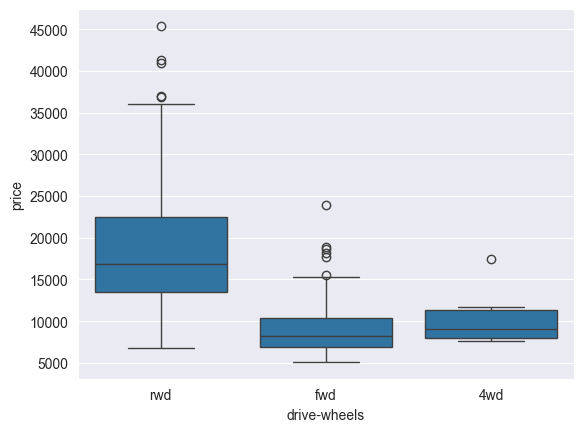

In [39]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

# Descriptive Statistical Analysis
## Let's first take a look at the variables by utilizing a description method.

### The describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

This will show:
* the count of that variable
* the mean
* the standard deviation (std)
* the minimum value
* the IQR (Interquartile Range: 25%, 50% and 75%)
* the maximum value

In [41]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


### Value Counts

In [45]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.reset_index(inplace=True)
drive_wheels_counts=drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'})
drive_wheels_counts

,value_counts,count
0,fwd,118
1,rwd,75
2,4wd,8


### Now let's rename the index to 'drive-wheels':

In [46]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts,count
drive-wheels,,
0,fwd,118
1,rwd,75
2,4wd,8


### We can repeat the above process for the variable 'engine-location'.

In [47]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


## Basics of Grouping

In [48]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [50]:
df_group_one = df[['drive-wheels','body-style','price']]

In [51]:
# grouping results
df_grouped = df_group_one.groupby(['drive-wheels'], as_index=False).agg({'price': 'mean'})
df_grouped

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


### From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

#### You can also group by multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combination of 'drive-wheels' and 'body-style'. We can store the results in the variable 'grouped_test1'.

In [52]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [53]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [54]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

# Question 4:¶
Use the "groupby" function to find the average "price" of each car based on "body-style".

In [58]:
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


# Variables: Drive Wheels and Body Style vs. Price
#### Let's use a heat map to visualize the relationship between Body Style vs Price.

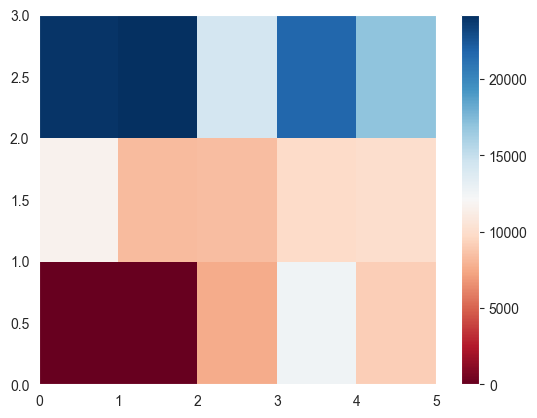

In [60]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

<p>The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' on the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.</p>

<p>The default labels convey no useful information to us. Let's change that:</p>

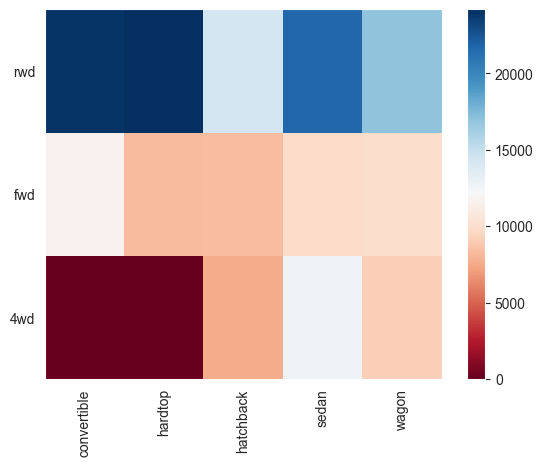

In [61]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

# Correlation and Causation

Correlation: a measure of the extent of interdependence between variables.

Causation: the relationship between cause and effect between two variables.

It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler the determining causation as causation may require independent experimentation.

Pearson Correlation

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

1: Perfect positive linear correlation.
0: No linear correlation, the two variables most likely do not affect each other.
-1: Perfect negative linear correlation.


Pearson Correlation is the default method of the function "corr". Like before, we can calculate the Pearson Correlation of the of the 'int64' or 'float64' variables.

In [63]:
df.corr() # if all numerical value then work

# P-value

## What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

### By convention, when the

* p-value is 
 0.001: we say there is strong evidence that the correlation is significant.
* the p-value is 
 0.05: there is moderate evidence that the correlation is significant.
* the p-value is 
 0.1: there is weak evidence that the correlation is significant.
* the p-value is 
 0.1: there is no evidence that the correlation is significant.

##### We can obtain this information using "stats" module in the "scipy" library.

In [67]:
import scipy.stats as stats

# Wheel-Base vs. Price¶

### Let's calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.

In [68]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732887e-20


### Conclusion:
Since the p-value is 
 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).

### Horsepower vs. Price

In [69]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.809574567003656  with a P-value of P =  6.36905742825956e-48


### Conclusion:
Since the p-value is 
 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).

### Length vs. Price¶

In [70]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 
print("""
Conclusion:
Since the p-value is 
 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).
""")

The Pearson Correlation Coefficient is 0.690628380448364  with a P-value of P =  8.016477466158871e-30

Conclusion:
Since the p-value is 
 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).



# Width vs. Price

In [71]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 
print("""
Conclusion:
Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).
""")

The Pearson Correlation Coefficient is 0.7512653440522674  with a P-value of P = 9.200335510481442e-38

Conclusion:
Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).



# Curb-Weight vs. Price

In [72]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  
print("""
Conclusion:
Since the p-value is 
 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).
""")

The Pearson Correlation Coefficient is 0.8344145257702845  with a P-value of P =  2.189577238893965e-53

Conclusion:
Since the p-value is 
 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).



# Bore vs. Price
##### Let's calculate the Pearson Correlation Coefficient and P-value of 'bore' and 'price':

In [73]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 
print("""
Conclusion:¶
Since the p-value is 
 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).
 """)

The Pearson Correlation Coefficient is 0.5431553832626603  with a P-value of P =   8.049189483935319e-17

Conclusion:¶
Since the p-value is 
 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).
 


# City-mpg vs. Price

In [75]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)
print("""
Conclusion:
Since the p-value is 
 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.
""")

The Pearson Correlation Coefficient is -0.6865710067844679  with a P-value of P =  2.3211320655675118e-29

Conclusion:
Since the p-value is 
 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.



# Highway-mpg vs. Price

In [76]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 
print("""
Conclusion:
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.
""")

The Pearson Correlation Coefficient is -0.7046922650589529  with a P-value of P =  1.7495471144476463e-31

Conclusion:
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.

